In [2]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler


In [3]:
# CSV 파일 로드
df = pd.read_csv("D:/에어비앤비/파리/listings.csv")

# 분석에 사용할 수치형 칼럼 선택
columns_to_keep = ['id', 'host_id','host_is_superhost','host_total_listings_count',
'neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','amenities',
'price','minimum_nights','maximum_nights','number_of_reviews_l30d',
'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_location','review_scores_value','reviews_per_month']  # 데이터에 맞게 칼럼명 수정

df = df[columns_to_keep]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           84397 non-null  int64  
 1   host_id                      84397 non-null  int64  
 2   host_is_superhost            84306 non-null  object 
 3   host_total_listings_count    84390 non-null  float64
 4   neighbourhood_cleansed       84397 non-null  object 
 5   room_type                    84397 non-null  object 
 6   accommodates                 84397 non-null  int64  
 7   bathrooms                    60959 non-null  float64
 8   bedrooms                     77480 non-null  float64
 9   beds                         60828 non-null  float64
 10  amenities                    84397 non-null  object 
 11  price                        60917 non-null  object 
 12  minimum_nights               84397 non-null  int64  
 13  maximum_nights  

In [5]:
df.columns = ['숙소_id', '호스트_id','슈퍼호스트','숙소_수','숙소_지역','숙소_유형','수용_인원수','욕실수','침실수','침대수','어메너티','숙소_가격','최소_숙박일','최대_숙박일','리뷰수','30일_리뷰수','리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수','평균_리뷰수']

In [6]:
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")
# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")


# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 4428
숙소_유형 제거 : 4207
욕실수, 침실수, 침대수 제거 후 : 4197
리뷰 결측치 제거 후 : 4197


In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()


Text(0.5, 1.0, 'Heatmap of Selected Columns')

C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


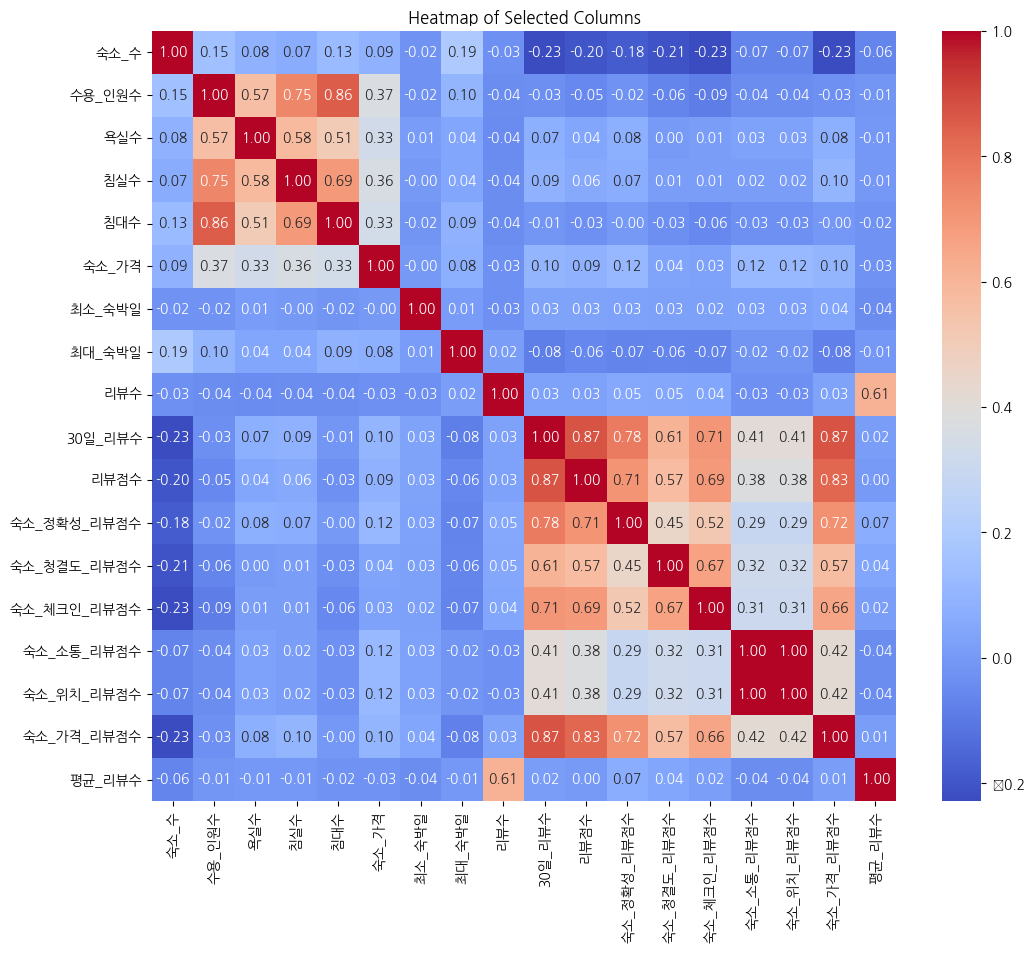

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# 관심 있는 컬럼 선택
selected_columns = df[[ '숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']]

# 상관관계 매트릭스 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Selected Columns')


In [22]:
import pandas as pd

# 데이터 로드
data = selected_columns

# 상관관계 계산
correlation_matrix = data.corr()


# 리뷰점수와의 상관관계
review_score_correlation = correlation_matrix['리뷰점수'].sort_values(ascending=False)

# 상관계수가 0.5 이상인 변수 출력
high_correlation = review_score_correlation[review_score_correlation > 0.5]
print("리뷰점수와 높은 상관관계를 가진 변수들:\n", high_correlation)


리뷰점수와 높은 상관관계를 가진 변수들:
 리뷰점수           1.000000
30일_리뷰수        0.872876
숙소_가격_리뷰점수     0.829695
숙소_정확성_리뷰점수    0.708034
숙소_체크인_리뷰점수    0.690869
숙소_청결도_리뷰점수    0.573617
Name: 리뷰점수, dtype: float64


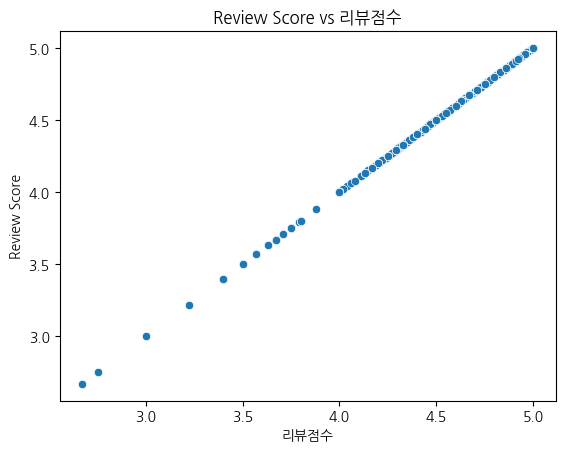

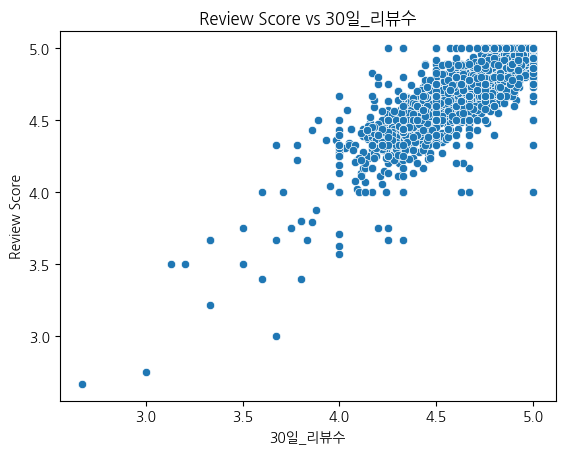

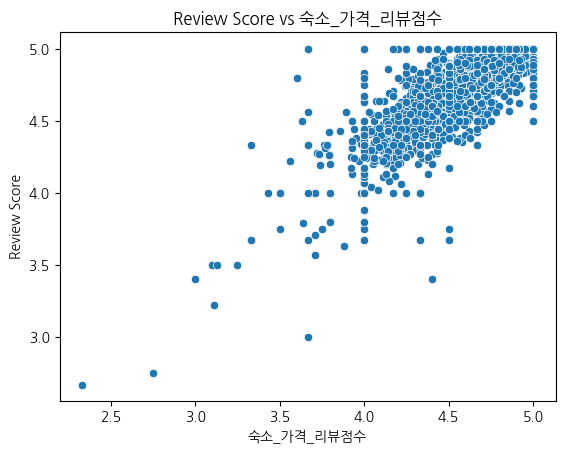

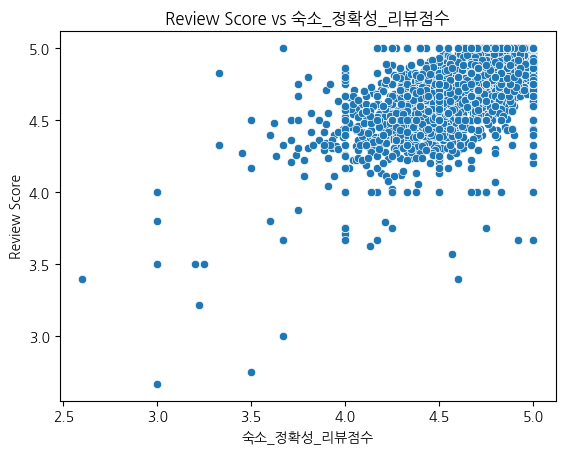

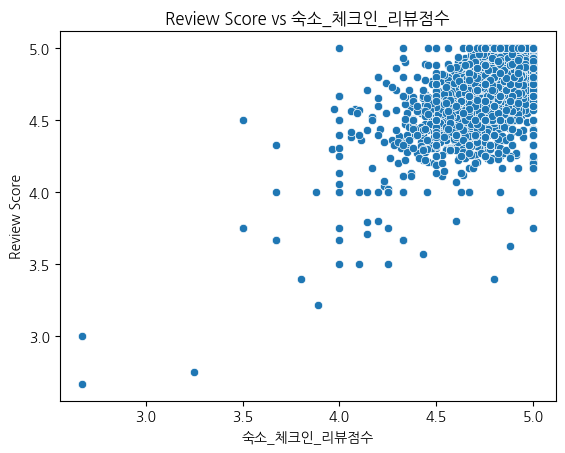

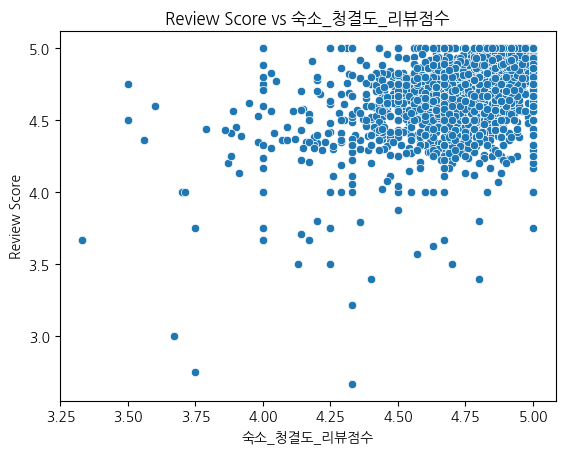

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계가 높은 변수에 대한 산점도 플롯
for column in high_correlation.index:
    sns.scatterplot(data=data, x=column, y='리뷰점수')
    plt.title(f'Review Score vs {column}')
    plt.xlabel(column)
    plt.ylabel('Review Score')
    plt.show()


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [25]:
# 데이터 로드
data = df

# 불필요한 칼럼 제거 (예: ID 칼럼 등)
data = data.drop(['숙소_id', '호스트_id'], axis=1)

# 범주형 변수를 더미 변수로 변환
data = pd.get_dummies(data)

# 결측치 처리
data.fillna(data.mean(), inplace=True)

# 타겟 변수(리뷰점수)와 특성 분리
X = data.drop('리뷰점수', axis=1)
y = data['리뷰점수']


In [26]:
# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 평가 지표 계산 (예: 평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.012288558630952354


In [31]:
# 피처 중요도 추출
importances = model.feature_importances_

# 피처 중요도를 Series로 변환
features = pd.Series(importances, index=X.columns)

# 중요도 순으로 피처 정렬
features_sorted = features.sort_values(ascending=False)

# 피처 중요도 시각화
#plt.figure(figsize=(10,8))
#features_sorted.plot(kind='bar')
#plt.title('Feature Importances')
#plt.show()


로지스틱 회귀

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [53]:
data['수용_인원수'] = data['수용_인원수'].astype('int64')
data['욕실수'] = data['욕실수'].astype('int64')
data['침대수'] = data['침대수'].astype('int64')
data['숙소_가격'] = data['숙소_가격'].astype('int64')

print(data)

                     숙소_id     호스트_id 슈퍼호스트  숙소_수              숙소_지역  \
2                     5396       7903     f   3.0     Hôtel-de-Ville   
17                  171159     193142     f   3.0             Élysée   
43                  193632     777533     t   3.0             Temple   
89                  221754    1150845     t   2.0    Buttes-Chaumont   
102                  75708     402348     t   3.0       Ménilmontant   
...                    ...        ...   ...   ...                ...   
82649  1103696635979533455  564997552     f   1.0  Buttes-Montmartre   
82975  1104437899838519130   13118197     f   2.0  Buttes-Montmartre   
83073  1105169305670543918   13262987     f   2.0  Buttes-Montmartre   
83158  1105941359456285384  344916015     f  27.0       Observatoire   
83393  1107148961327481954   36120497     f   1.0            Reuilly   

                 숙소_유형  수용_인원수  욕실수  침실수  침대수  ... 30일_리뷰수  리뷰점수  숙소_정확성_리뷰점수  \
2      Entire home/apt       2    1  0.0    1  ...    

In [54]:
# 데이터 로드
data = df

# '리뷰점수'를 기준으로 이진 분류 타겟 생성 (예: 점수가 8 이상이면 1, 그렇지 않으면 0)
data['High_Rating'] = (data['리뷰점수'] >= 8).astype(int)

# 필요한 특성 선택 (예시: '수용_인원수', '욕실수', '침대수', '숙소_가격')
features = data[['수용_인원수', '욕실수', '침대수', '숙소_가격']]
target = data['High_Rating']

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [55]:
# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [56]:
print(data['High_Rating'].value_counts())


High_Rating
0    4197
Name: count, dtype: int64


In [57]:
# 다른 기준 적용 예시
data['High_Rating'] = (data['리뷰점수'] >= 8).astype(int)
print(data['High_Rating'].value_counts())


High_Rating
0    4197
Name: count, dtype: int64


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4197 entries, 2 to 83393
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        4197 non-null   int64  
 1   호스트_id       4197 non-null   int64  
 2   슈퍼호스트        4197 non-null   object 
 3   숙소_수         4197 non-null   float64
 4   숙소_지역        4197 non-null   object 
 5   숙소_유형        4197 non-null   object 
 6   수용_인원수       4197 non-null   int64  
 7   욕실수          4197 non-null   float64
 8   침실수          4197 non-null   float64
 9   침대수          4197 non-null   float64
 10  어메너티         4197 non-null   object 
 11  숙소_가격        4197 non-null   float64
 12  최소_숙박일       4197 non-null   int64  
 13  최대_숙박일       4197 non-null   int64  
 14  리뷰수          4197 non-null   int64  
 15  30일_리뷰수      4197 non-null   float64
 16  리뷰점수         4197 non-null   float64
 17  숙소_정확성_리뷰점수  4197 non-null   float64
 18  숙소_청결도_리뷰점수  4197 non-null   float64
 19  숙소_체크인_리뷰점

In [58]:
# 데이터 분할 후 각 세트의 클래스 분포 확인
X_train, X_test, y_train, y_test = train_test_split(data[features], data['High_Rating'], test_size=0.2, random_state=42, stratify=data['High_Rating'])
print(y_train.value_counts())
print(y_test.value_counts())


ValueError: Boolean array expected for the condition, not int64

In [59]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

카이제곱검정 리뷰점수, 숙소가격

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency


In [11]:
# 데이터 로드 (예제)
data = pd.DataFrame(df)

# 데이터 살펴보기
print(data.head())


      숙소_id   호스트_id 슈퍼호스트  숙소_수            숙소_지역            숙소_유형  수용_인원수  \
2      5396     7903     f   3.0   Hôtel-de-Ville  Entire home/apt       2   
17   171159   193142     f   3.0           Élysée  Entire home/apt       2   
43   193632   777533     t   3.0           Temple  Entire home/apt       2   
89   221754  1150845     t   2.0  Buttes-Chaumont  Entire home/apt       2   
102   75708   402348     t   3.0     Ménilmontant  Entire home/apt       2   

     욕실수  침실수  침대수  ... 리뷰수  30일_리뷰수  리뷰점수  숙소_정확성_리뷰점수  숙소_청결도_리뷰점수  \
2    1.0  0.0  1.0  ...   5     4.60  4.63         4.57         4.81   
17   1.0  0.0  1.0  ...   4     4.32  4.54         4.20         4.65   
43   1.0  0.0  1.0  ...   3     4.67  4.68         4.65         4.90   
89   1.0  0.0  1.0  ...   5     4.83  4.83         4.78         4.87   
102  1.5  1.0  1.0  ...   3     4.70  4.80         4.80         4.84   

     숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  숙소_가격_리뷰점수  평균_리뷰수  
2           4.84        4.96       

In [62]:
# 교차 테이블 생성
contingency_table = pd.crosstab(data['리뷰점수'], data['숙소_가격'])
print(contingency_table)


숙소_가격  23    27    29    30    33    34    36    39    40    41    ...  1027  \
리뷰점수                                                               ...         
2.67      0     0     0     0     0     0     0     0     0     0  ...     0   
2.75      0     0     0     0     0     0     0     0     0     0  ...     0   
3.00      0     0     0     0     0     0     0     0     0     0  ...     0   
3.22      0     0     0     0     0     0     0     0     0     0  ...     0   
3.40      0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4.96      0     0     0     0     0     0     0     0     0     0  ...     0   
4.97      0     0     0     0     0     0     0     0     0     0  ...     0   
4.98      0     0     0     0     0     0     0     0     0     0  ...     0   
4.99      0     0     0     0     0     0     0     0     0     0  ...     0   
5.00      0     0     0     1     0     

In [63]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square statistic: 40551.32953019658
p-value: 1.0
Degrees of freedom: 49714
Expected frequencies:
 [[0.00023827 0.00023827 0.00023827 ... 0.00023827 0.00023827 0.00023827]
 [0.00023827 0.00023827 0.00023827 ... 0.00023827 0.00023827 0.00023827]
 [0.00023827 0.00023827 0.00023827 ... 0.00023827 0.00023827 0.00023827]
 ...
 [0.00857756 0.00857756 0.00857756 ... 0.00857756 0.00857756 0.00857756]
 [0.00190612 0.00190612 0.00190612 ... 0.00190612 0.00190612 0.00190612]
 [0.13461997 0.13461997 0.13461997 ... 0.13461997 0.13461997 0.13461997]]


Chi-square statistic: 40,551.32953019658
이 값은 굉장히 큰 검정 통계량입니다. 이는 관찰된 빈도와 기대 빈도 간에 상당히 큰 차이가 있다는 것을 의미합니다. 일반적으로, 카이제곱 통계량이 크면, 두 범주형 변수 사이에 더 강한 연관성이 있음을 나타냅니다.
p-value: 1.0
일반적으로 p-value가 0.05 이하일 때 두 변수 사이에 통계적으로 유의미한 관계가 있다고 결론지을 수 있습니다. 그러나 여기서 p-value는 1.0입니다. 이는 귀무 가설(두 변수 사이에 관계가 없다)을 기각할 수 없음을 의미하며, 이론적으로 두 변수 사이에 관계가 없다고 해석할 수 있습니다. 그러나 이러한 극단적인 p-value는 데이터 처리나 검정 절차에 문제가 있을 가능성을 시사합니다.
Degrees of freedom: 49,714
자유도가 매우 높은 값입니다. 이는 분석에 포함된 범주(카테고리)의 수가 매우 많다는 것을 의미합니다. 자유도가 높을수록 검정의 복잡성이 증가하며, 이는 통계적 분석에서 어려움을 초래할 수 있습니다.
Expected frequencies:
기대 빈도가 매우 작은 값들로 구성되어 있습니다. 이는 특정 카테고리에 충분한 관찰 빈도가 없음을 나타내며, 카이제곱 검정의 신뢰성을 떨어뜨릴 수 있습니다. 일반적으로 기대 빈도가 5 미만인 셀의 비율이 전체의 20% 이상이면 카이제곱 검정 결과의 신뢰성이 떨어집니다.

In [12]:
contingency_table = pd.crosstab(data['리뷰점수'], data['숙소_가격_리뷰점수'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

숙소_가격_리뷰점수  2.33  2.75  3.00  3.10  3.11  3.13  3.25  3.33  3.43  3.50  ...  \
리뷰점수                                                                    ...   
2.67           1     0     0     0     0     0     0     0     0     0  ...   
2.75           0     1     0     0     0     0     0     0     0     0  ...   
3.00           0     0     0     0     0     0     0     0     0     0  ...   
3.22           0     0     0     0     1     0     0     0     0     0  ...   
3.40           0     0     1     0     0     0     0     0     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
4.96           0     0     0     0     0     0     0     0     0     0  ...   
4.97           0     0     0     0     0     0     0     0     0     0  ...   
4.98           0     0     0     0     0     0     0     0     0     0  ...   
4.99           0     0     0     0     0     0     0     0     0     0  ...   
5.00           0     0     0     0     0     0     0

In [13]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 76160.9822151004
p-value: 0.0
Degrees of freedom: 14204
Expected frequencies:
 [[2.38265428e-04 2.38265428e-04 2.38265428e-04 ... 2.38265428e-04
  2.38265428e-04 6.81439123e-02]
 [2.38265428e-04 2.38265428e-04 2.38265428e-04 ... 2.38265428e-04
  2.38265428e-04 6.81439123e-02]
 [2.38265428e-04 2.38265428e-04 2.38265428e-04 ... 2.38265428e-04
  2.38265428e-04 6.81439123e-02]
 ...
 [8.57755540e-03 8.57755540e-03 8.57755540e-03 ... 8.57755540e-03
  8.57755540e-03 2.45318084e+00]
 [1.90612342e-03 1.90612342e-03 1.90612342e-03 ... 1.90612342e-03
  1.90612342e-03 5.45151299e-01]
 [1.34619967e-01 1.34619967e-01 1.34619967e-01 ... 1.34619967e-01
  1.34619967e-01 3.85013105e+01]]


1. Chi-square Statistic
매우 높은 카이제곱 통계량은 관찰된 빈도와 기대 빈도 사이에 큰 차이가 있음을 나타냅니다. 이는 두 범주형 변수 간에 강한 연관성이 있음을 시사합니다.
2. p-value
p-value가 0.0이라는 것은 귀무 가설(두 변수 사이에 독립적인 관계가 없다)을 기각하는 매우 강력한 증거입니다. 즉, 두 범주형 변수 사이에 통계적으로 유의미한 관계가 있음을 의미합니다.
3. Degrees of Freedom
자유도가 14,204로 매우 높은 것은 분석에 사용된 범주의 수가 매우 많음을 나타냅니다. 이는 교차 테이블(분할표)에서 많은 수의 카테고리가 포함되어 있음을 의미하며, 데이터의 복잡성을 나타냅니다.
4. Expected Frequencies
기대 빈도가 일부 카테고리에서 매우 낮은 값을 보이는 것으로 보입니다. 이는 일부 범주가 충분한 데이터 포인트를 가지고 있지 않을 수 있음을 의미합니다. 카이제곱 검정의 유효성을 위해서는 모든 카테고리의 기대 빈도가 최소 5 이상이 되어야 합니다. 기대 빈도가 5 미만인 카테고리의 비율이 전체의 20%를 초과하면 검정 결과의 신뢰성이 저하될 수 있습니다.